# Apache MXNet Basic 실습
## Symbol - Neural network graphs와 자동 미분(auto-differentiation)

* Symbol은 이용한 선언형(declarative) 프로그래밍 방법은,

    1. 입력과 출력에 대한 Placeholder을 포함한 연산 그래프 정의
    2. NDArray 변수들을 Placeholder에 바인딩한 후, 그래프 연산을 계산


* 최적화된 연산 수행 (예, 메모리 재사용을 통한 적은 메모리 사용)

> 참조 사이트
>
> [MXNet How To](http://mxnet.io/how_to/index.html)
>
> [MXNet Architecture](http://mxnet.io/architecture/index.html)
>
> [a more thorough discussion on the comparative strengths of imperative and symbolic programing](http://mxnet.io/architecture/program_model.html)
> 
> [Symbolic Configuration and Execution in Pictures](http://mxnet.io/api/python/symbol_in_pictures.html).

## 기본 Symbol 조합

### <font color='red'>기본 연산들</font>

아래 예제는 간단한 그래프 연산 `a + b` 을 정의합니다. 우선, `mx.sym.Variable`를 이용해서 placeholder 두개를 정의하고, `+` 연산부호로 원하는 symbol을 정의합니다. 각 placeholder에는 a,b라는 이름을 정하지만, 정하지 않을 경우에는 MXNet이 임의로 이름을 할당합니다.

In [2]:
import mxnet as mx
a = mx.sym.Variable('a')
b = mx.sym.Variable('b')
c = a + b
(a, b, c)

(<Symbol a>, <Symbol b>, <Symbol _plus1>)

/Users/muhyun/anaconda/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-19 10:06:06.541460. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


`NDArray`에서 지원하는 대부분의 연산들은 `Symbol`에서도 제공됩니다.

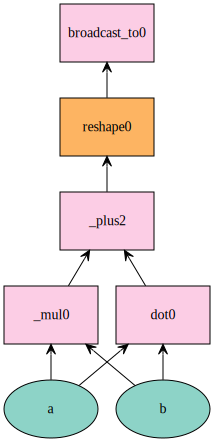

/Users/muhyun/anaconda/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-19 10:06:42.168359. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [3]:
# elemental wise multiplication
d = a * b
# matrix multiplication
e = mx.sym.dot(a, b)
# reshape
f = mx.sym.reshape(d+e, shape=(1,4))
# broadcast
g = mx.sym.broadcast_to(f, shape=(2,4))
# plot
mx.viz.plot_network(symbol=g)

위 예제들에서 정의된 연산 그래프들은 `bind` 함수를 통해서 실제로 사용할 입력 데이터를 적용하여 그래프 연산을 수행할 수 있습니다. 예제는 아래 `데이터 연결 및 수행`에서 살펴보겠습니다.

### <font color='red'>기본 Neural Networks</font>

기본 연산외에, `Symbol`을 사용해서 다양한 Neural Network 래이어들을 정의할 수 있습니다. 다음 예제는 2-layer fully connected neural를 Symbol을 사용해서 정의해봅니다. 이렇게 정의된 neural network는 mx.viz.plot_network를 이용해서 시각화할 수도 있습니다.

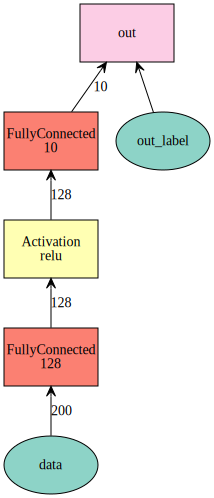

/Users/muhyun/anaconda/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-19 10:12:58.530304. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [4]:
net = mx.sym.Variable('data')
net = mx.sym.FullyConnected(data=net, name='fc1', num_hidden=128)
net = mx.sym.Activation(data=net, name='relu1', act_type="relu")
net = mx.sym.FullyConnected(data=net, name='fc2', num_hidden=10)
net = mx.sym.SoftmaxOutput(data=net, name='out')
mx.viz.plot_network(net, shape={'data':(100,200)})

각 symbol은 고유한 문자열로 구성된 이름을 갖습니다. NDArray와 Symbol은 하나의 tensor (다차원 행렬)를 의미하며, **연산자**는 tensor들간의 연산을 정의합니다. 연잔자는 Symbol 또는 NDArray를 입력으로 받으며, hidden neuron 개수 (*num_hidden*)이나 activation type (*act_type*) 등과 같은 **hyperparameter**들을 입력받습니다.

Symbol을 여러 argument들을 받는 함수로 생각할 수도 있습니다. 이 argument들은 다음 함수를 통해서 조회할 수 있습니다.

In [6]:
net.list_arguments()

['data', 'fc1_weight', 'fc1_bias', 'fc2_weight', 'fc2_bias', 'out_label']

/Users/muhyun/anaconda/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-19 10:21:23.204542. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


위 argument들은 각 symbol에 필요한 파라메터와 입력들로 각 의미는 아래와 같습니다.

- *data*: *data* 변수에 필요한 입력 데이터
- *fc1_weight*와 *fc1_bias*: 첫번째 fully connected layer *fc1*에서 사용되는 weight와 bias
- *fc2_weight*와 *fc2_bias*: 두번째 fully connected layer *fc1*에서 사용되는 weight와 bias
- *out_label*: loss에 필요한 label

임의로 할당되는 이름 대신에, 각 argument에 이름을 명시적으로 할당하는 것도 가능합니다.

In [7]:
net = mx.symbol.Variable('data')
w = mx.symbol.Variable('myweight')
net = mx.symbol.FullyConnected(data=net, weight=w, name='fc1', num_hidden=128)
net.list_arguments()

['data', 'myweight', 'fc1_bias']

/Users/muhyun/anaconda/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-19 10:25:05.736529. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## <font color='red'>복잡한 조합</font>

MXNet은 deep learning에서 일반적으로 사용되는 레이어들에 대한 최적화된 symbol들을 제공합니다. 다음 예제는 두 symbol을 정의하고 element-wise 합을 계산하고, 128개 hidden neuron들을 갖는 fully-connected layer를 정의합니다.

In [8]:
lhs = mx.symbol.Variable('data1')
rhs = mx.symbol.Variable('data2')
net = mx.symbol.FullyConnected(data=lhs + rhs, name='fc1', num_hidden=128)
net.list_arguments()

['data1', 'data2', 'fc1_weight', 'fc1_bias']

/Users/muhyun/anaconda/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-19 10:28:35.973693. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


위 예제는 Single forward 조합을 하고 있지만, 보다 복잡한 조합도 가능합니다. 다음 예제는 두개의 Symbol (net1, net2)를 각각 정의하고, net2을 net1에 적용하는 것을 보여줍니다. 이렇게 만들어진 composed symbol은 net1과 net2의 모든 속성들을 갖습니다.

In [28]:
data = mx.symbol.Variable('data')
net1 = mx.symbol.FullyConnected(data=data, name='fc1', num_hidden=10)

net2 = mx.symbol.Variable('data2')
net2 = mx.symbol.FullyConnected(data=net2, name='fc2', num_hidden=10)

composed = net2(data2=net1, name='composed')
composed.list_arguments()
#mx.viz.plot_network(net1)
#mx.viz.plot_network(net2)
#mx.viz.plot_network(composed)

['data', 'fc1_weight', 'fc1_bias', 'fc2_weight', 'fc2_bias']

/Users/muhyun/anaconda/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-19 10:39:46.119488. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


큰 네트워크를 구성하는 경우에는 공통 prefix를 symbol에 적용해서 네트워크 구조를 알기 쉽게할 수 있습니다. 이를 위해서 `mx.name.Prefix` 함수를 아래와 같이 사용합니다.

In [29]:
data = mx.sym.Variable("data")
net = data
n_layer = 2
for i in range(n_layer):
    with mx.name.Prefix("layer%d_" % (i + 1)):
        net = mx.sym.FullyConnected(data=net, name="fc", num_hidden=100)
net.list_arguments()

['data',
 'layer1_fc_weight',
 'layer1_fc_bias',
 'layer2_fc_weight',
 'layer2_fc_bias']

/Users/muhyun/anaconda/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-19 10:41:19.417599. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


### Modularized Construction for Deep Networks

Constructing a *deep* network layer by layer, (like the Google Inception network),
can be tedious owing to the large number of layers.
So, for such networks, we often modularize the construction.

For example, in Google Inception network,
we can first define a factory function which chains the convolution,
batch normalization and rectified linear unit (ReLU) activation layers together.

In [ ]:
def ConvFactory(data, num_filter, kernel, stride=(1,1), pad=(0, 0),name=None, suffix=''):
    conv = mx.sym.Convolution(data=data, num_filter=num_filter, kernel=kernel,
                  stride=stride, pad=pad, name='conv_%s%s' %(name, suffix))
    bn = mx.sym.BatchNorm(data=conv, name='bn_%s%s' %(name, suffix))
    act = mx.sym.Activation(data=bn, act_type='relu', name='relu_%s%s'
                  %(name, suffix))
    return act
prev = mx.sym.Variable(name="Previous Output")
conv_comp = ConvFactory(data=prev, num_filter=64, kernel=(7,7), stride=(2, 2))
shape = {"Previous Output" : (128, 3, 28, 28)}
mx.viz.plot_network(symbol=conv_comp, shape=shape)

Then we can define a function that constructs an inception module based on
factory function `ConvFactory`.

In [ ]:
def InceptionFactoryA(data, num_1x1, num_3x3red, num_3x3, num_d3x3red, num_d3x3,
                      pool, proj, name):
    # 1x1
    c1x1 = ConvFactory(data=data, num_filter=num_1x1, kernel=(1, 1), name=('%s_1x1' % name))
    # 3x3 reduce + 3x3
    c3x3r = ConvFactory(data=data, num_filter=num_3x3red, kernel=(1, 1), name=('%s_3x3' % name), suffix='_reduce')
    c3x3 = ConvFactory(data=c3x3r, num_filter=num_3x3, kernel=(3, 3), pad=(1, 1), name=('%s_3x3' % name))
    # double 3x3 reduce + double 3x3
    cd3x3r = ConvFactory(data=data, num_filter=num_d3x3red, kernel=(1, 1), name=('%s_double_3x3' % name), suffix='_reduce')
    cd3x3 = ConvFactory(data=cd3x3r, num_filter=num_d3x3, kernel=(3, 3), pad=(1, 1), name=('%s_double_3x3_0' % name))
    cd3x3 = ConvFactory(data=cd3x3, num_filter=num_d3x3, kernel=(3, 3), pad=(1, 1), name=('%s_double_3x3_1' % name))
    # pool + proj
    pooling = mx.sym.Pooling(data=data, kernel=(3, 3), stride=(1, 1), pad=(1, 1), pool_type=pool, name=('%s_pool_%s_pool' % (pool, name)))
    cproj = ConvFactory(data=pooling, num_filter=proj, kernel=(1, 1), name=('%s_proj' %  name))
    # concat
    concat = mx.sym.Concat(*[c1x1, c3x3, cd3x3, cproj], name='ch_concat_%s_chconcat' % name)
    return concat
prev = mx.sym.Variable(name="Previous Output")
in3a = InceptionFactoryA(prev, 64, 64, 64, 64, 96, "avg", 32, name="in3a")
mx.viz.plot_network(symbol=in3a, shape=shape)

Finally, we can obtain the whole network by chaining multiple inception
modules. See a complete example
[here](https://github.com/dmlc/mxnet/blob/master/example/image-classification/symbols/inception-bn.py).

### Group Multiple Symbols

To construct neural networks with multiple loss layers, we can use
`mxnet.sym.Group` to group multiple symbols together. The following example
groups two outputs:

In [ ]:
net = mx.sym.Variable('data')
fc1 = mx.sym.FullyConnected(data=net, name='fc1', num_hidden=128)
net = mx.sym.Activation(data=fc1, name='relu1', act_type="relu")
out1 = mx.sym.SoftmaxOutput(data=net, name='softmax')
out2 = mx.sym.LinearRegressionOutput(data=net, name='regression')
group = mx.sym.Group([out1, out2])
group.list_outputs()

## NDArray와 관계

`NDArray`의 장점:

- Straightforward.
- Easy to work with native language features (for loop, if-else condition, ..)
  and libraries (numpy, ..).
- Easy step-by-step code debugging.

`Symbol`의 장점::

- Provides almost all functionalities of NDArray, such as `+`, `*`, `sin`,
  `reshape` etc.
- Easy to save, load and visualize.
- Easy for the backend to optimize the computation and memory usage.

## Symbol 조작하기

`NDArray`와 비교해서 `Symbol`의 가장 중요한 차이점은, 연산을 먼저 정의하고, 데이터를 연산에 할당해서 실행한다는 것입니다. 다음 예제들에서는 Symbol을 직접 조작하는 방법을 소개합니다. 이를 위해서 `module` 패키지를 사용합니다.

### <font color='red'>모양(Shape) 와 타입(Type) Inference</font>

각 Symbol의 argument, 보조 상태(auxiliary states), 및 output들을 조회할 수 있습니다. input shape과 argument 타입에 따라서, output shape이나 symbol의 타입이 어떻게 되는지 유추해보는 예제는 아래와 같습니다.

In [35]:
arg_name = c.list_arguments()  # get the names of the inputs
out_name = c.list_outputs()    # get the names of the outputs
# infers output shape given the shape of input arguments
arg_shape, out_shape, _ = c.infer_shape(a=(2,3), b=(2,3))
# infers output type given the type of input arguments
arg_type, out_type, _ = c.infer_type(a='float32', b='float32')
print({'input' : dict(zip(arg_name, arg_shape)),'output' : dict(zip(out_name, out_shape))})
print({'input' : dict(zip(arg_name, arg_type)),'output' : dict(zip(out_name, out_type))})

{'input': {'a': (2, 3), 'b': (2, 3)}, 'output': {'_plus1_output': (2, 3)}}
{'input': {'a': <class 'numpy.float32'>, 'b': <class 'numpy.float32'>}, 'output': {'_plus1_output': <class 'numpy.float32'>}}


/Users/muhyun/anaconda/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-19 10:49:25.861923. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


### <font color='red'>데이터 Bind과 수행</font>

Symbol `c`는 `a` + `b`를 정의하고 있습니다. 이를 계산하기 위해서는 argument들에 데이터를 바인딩해야 합니다. 바인딩은 `bind` 함수에 device context로 원하는 디바이스(CPU, GPU)를 지정하고 각 변수를 `NDArray`에 매핑하는 `dict`를 전달하고, 그 결과로 executor를 리턴받습니다. executor의 `forward` 함수를 수행해서 연산을 실행하고, `outputs` 속성을 통해서 모든 결과들을 조회합니다.

In [36]:
ex = c.bind(ctx=mx.cpu(), args={'a' : mx.nd.ones([2,3]),
                                'b' : mx.nd.ones([2,3])})
ex.forward()
print('number of outputs = %d\nthe first output = \n%s' % (
           len(ex.outputs), ex.outputs[0].asnumpy()))

number of outputs = 1
the first output = 
[[ 2.  2.  2.]
 [ 2.  2.  2.]]


/Users/muhyun/anaconda/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-19 11:00:57.780041. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


동일한 Symbol을 다른 데이터를 이용해서 GPU 자원에서 수행하는 것도 가능합니다.

**Note** In order to execute the following section on a cpu set gpu_device to mx.cpu().

In [ ]:
gpu_device=mx.gpu() # Change this to mx.cpu() in absence of GPUs.

ex_gpu = c.bind(ctx=gpu_device, args={'a' : mx.nd.ones([3,4], gpu_device)*2,
                                      'b' : mx.nd.ones([3,4], gpu_device)*3})
ex_gpu.forward()
ex_gpu.outputs[0].asnumpy()

`eval` 함수를 통해서 symbol을 evaluate할 수도 있습니다. `eval` 함수는 `bind` 함수와 `forward` 함수를 함께 호출합니다.

In [37]:
ex = c.eval(ctx = mx.cpu(), a = mx.nd.ones([2,3]), b = mx.nd.ones([2,3]))
print('number of outputs = %d\nthe first output = \n%s' % (
            len(ex), ex[0].asnumpy()))

number of outputs = 1
the first output = 
[[ 2.  2.  2.]
 [ 2.  2.  2.]]


/Users/muhyun/anaconda/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-19 11:03:21.656008. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


Neural network에서 모든 argument 배열을 자동으로 생성해주는 ```simple_bind``` 함수도 많이 사용됩니다. ```simple_bind```를 호출한 후, ```forward```를 호출해서 결과를 계산하거나, 필요한 경우 ```backward``` 함수를 호출해서 gradient를 구할 수 있습니다.

### <font color='red'>Load and Save</font>

Logically symbols correspond to ndarrays. Symbol와 NDArray는 tensor를 표현하고, 연산의 입력 또는 출력에 사용됩니다. 이후 사용을 위해서, `Symbol` 객체는 `pickle` 또는 `save`/`load` 함수를 이용해서 serialize한 후 파일에 저장하고 다시 읽어올 수 있습니다.

`NDArray`를 serialize하면, tensor 데이터가 직렬화되고, 바이너리 형태로 디스크에 저장됩니다.

하지만, Symbol은 연산들을 채인으로 구성된 그래프를 표한하고 있습니다. 이 그래프는 output symbol로 표현됩니다. `Symbol`을 직렬화하면, 해당 symbol이 output인 그래프를 직렬화합니다. 직렬화된 내용은 읽기 쉬운 `json` 형식으로 변경되며, `tojson` 함수를 이용해서 `json` 문자열로 변경할 수 있습니다.

In [38]:
print(c.tojson())
c.save('symbol-c.json')
c2 = mx.sym.load('symbol-c.json')
c.tojson() == c2.tojson()

{
  "nodes": [
    {
      "op": "null", 
      "name": "a", 
      "inputs": []
    }, 
    {
      "op": "null", 
      "name": "b", 
      "inputs": []
    }, 
    {
      "op": "elemwise_add", 
      "name": "_plus1", 
      "inputs": [[0, 0, 0], [1, 0, 0]]
    }
  ], 
  "arg_nodes": [0, 1], 
  "node_row_ptr": [0, 1, 2, 3], 
  "heads": [[2, 0, 0]], 
  "attrs": {"mxnet_version": ["int", 1000]}
}


True

/Users/muhyun/anaconda/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-19 11:12:58.081246. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Customized Symbol

Most operators such as `mx.sym.Convolution` and `mx.sym.Reshape` are implemented
in C++ for better performance. MXNet also allows users to write new operators
using any front-end language such as Python. It often makes the developing and
debugging much easier. To implement an operator in Python, refer to
[How to create new operators](http://mxnet.io/how_to/new_op.html).

## Advanced Usages

### Type Cast

By default, MXNet uses 32-bit floats.
But for better accuracy-performance,
we can also use a lower precision data type.
For example, The Nvidia Tesla Pascal GPUs
(e.g. P100) have improved 16-bit float performance,
while GTX Pascal GPUs (e.g. GTX 1080) are fast on 8-bit integers.

To convert the data type as per the requirements,
we can use `mx.sym.cast` operator as follows:

In [ ]:
a = mx.sym.Variable('data')
b = mx.sym.cast(data=a, dtype='float16')
arg, out, _ = b.infer_type(data='float32')
print({'input':arg, 'output':out})

c = mx.sym.cast(data=a, dtype='uint8')
arg, out, _ = c.infer_type(data='int32')
print({'input':arg, 'output':out})

### Variable Sharing

To share the contents between several symbols,
we can bind these symbols with the same array as follows:

In [ ]:
a = mx.sym.Variable('a')
b = mx.sym.Variable('b')
b = a + a * a

data = mx.nd.ones((2,3))*2
ex = b.bind(ctx=mx.cpu(), args={'a':data, 'b':data})
ex.forward()
ex.outputs[0].asnumpy()


<!-- INSERT SOURCE DOWNLOAD BUTTONS -->

